This notebook documents the process of exploring, cleaning, and analysing the datasets sourced from kaggle and building machine learning models capable of:

1. Classifying stellar objects into Star,Galaxy or QSO [Stellar Dataset](https://drive.google.com/file/d/1wyfK1FhBraO-_DVVxttOQe_xy39yoSrs/view?usp=sharing)
2. Predicting the life expectancy based on various factors (Regression). [Life expectancy Dataset](https://drive.google.com/file/d/1bpXVBeM7LyfLdzDt8-ZCdA6NV-Uj711u/view?usp=drive_link)

# **CLASSIFICATION** 

## **Data Preprocessing and Exploratory Data Analysis**

It is an essential step in the machine learning process. It helps us become familiar with our dataset and understand its features and targets, along with their relationship. It helps us to prepare a clean and usable dataset and determine the machine learning model. Overall it sets the stage to make informed decision throughout the modelling process.

### Importing necessary libraries required for data preprocessing and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#to ignore any warnings generated

### Basic Overview of the Dataset

In [3]:
df=pd.read_csv("/kaggle/input/star-classification/star_classification1.csv")

In [4]:
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.tail(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


The above output provides us a clear representation of the structure of our dataset. The dataset consists of 17 feature columns and 1 target column. This helps to be familiar with the dimension of our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       99990 non-null   float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

The provided output gives us general idea about the data types that our dataset comprises of. We can observe that the target column is of object data type while the feature columns consists of both float and integer data type.

### Checking and Handling duplicate values


In [7]:
print(f"Total number of duplicated values in the dataset {df.duplicated().sum()}")

Total number of duplicated values in the dataset 0


There were no duplicate values present in the dataset.If present we would drop them using drop_duplicates().

### Checking and Handling missing values 

In [8]:
df.isna().sum()

obj_ID         10
alpha           0
delta           0
u               0
g               0
r               0
i               0
z               0
run_ID          0
rerun_ID        0
cam_col         0
field_ID        0
spec_obj_ID     0
class           0
redshift        0
plate           0
MJD             0
fiber_ID        0
dtype: int64

The obj_ID  has around  10 missing values. We will use data imputation techniques to handle those missing values.

**Linear interpolation**

Linear interpolation is an imputation technique that fills the missing values with the value thatlies in between the preceeding and succeeding values.

In [9]:
df['obj_ID']=df["obj_ID"].interpolate(method="linear")

In [10]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

The missing values have been successfully handled.

### Summary Statistics 

**Separating categorical and numerical columns**

In [11]:
numericCol=df.select_dtypes(exclude="object");
categoricalCol=df.select_dtypes(include="object");


**Summary statistics for Numerical Columns**

In [12]:
numericCol.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438501e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


The provided output helps us in understanding the central tendency,dispersion and data distributions of the features in our dataset.

* **Count**: Represents the non-null values for each attributes
* **Mean** :Represents the average values for each attributes
* **std**:Represents the spread of data around the mean
* **min**: represents the minimum values for each attributes.
* **25%**: Represents Q1,that indicates 25% of datas fall under this value.
* **50%**: Represents median,that indicates 50% of datas fall under this value.
* **75%**: Represents Q3,that indicates 75% of datas fall under this value.
* **max**: Represents the maximum values for each attributes.

**Summary statistics for categorical Columns**

In [13]:
print("The descriptive summary for the target column")
print(categoricalCol.describe())

The descriptive summary for the target column
         class
count   100000
unique       3
top     GALAXY
freq     59445


The above output provides the summary statistics for target column, where Galaxy can be observed as the highest occuring class with frequency of 59445.

### Univariate Analysis 

Univariate analysis is a crucial step as it helps us to analyse individual vairables which can help in understanding the columns of our dataset , including but not limited to outliers and data distribution.

**Some univariate analysis:**
* **Categorical**
    1. Count Plot
    2. Pie Chart
* **Numerical**
    1. Histogram
    2. Distplot
    3. Box plot 

**Countplot of our target column**

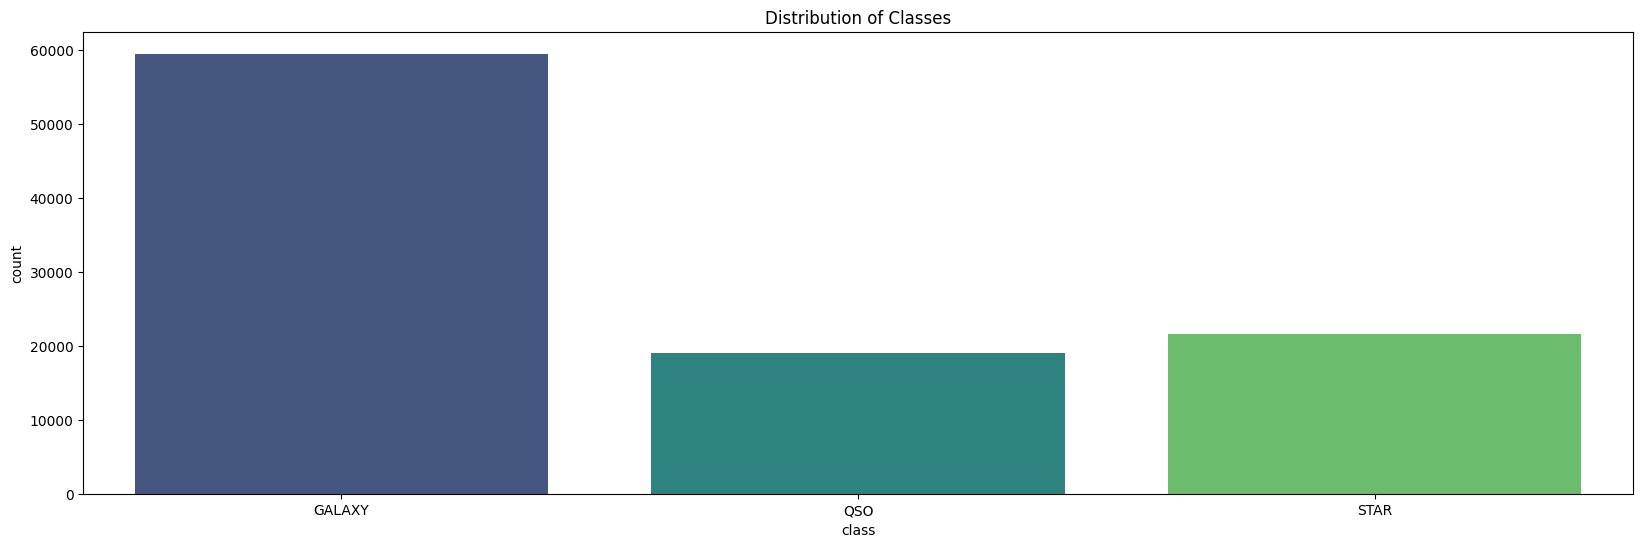

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Classes')
plt.show()
df["class"].value_counts()

The above plot shows that the Galaxy clearly outnumbers other two classes. This shows that there is imbalance is the classes and can pose a potential challenge for machine learning models.

**Box Plot**

Box Plot helps to visually summarize the distribution of  numerical data. It can be useful to understand the data distribution, its skewness,central tendency as well as any potential outliers.

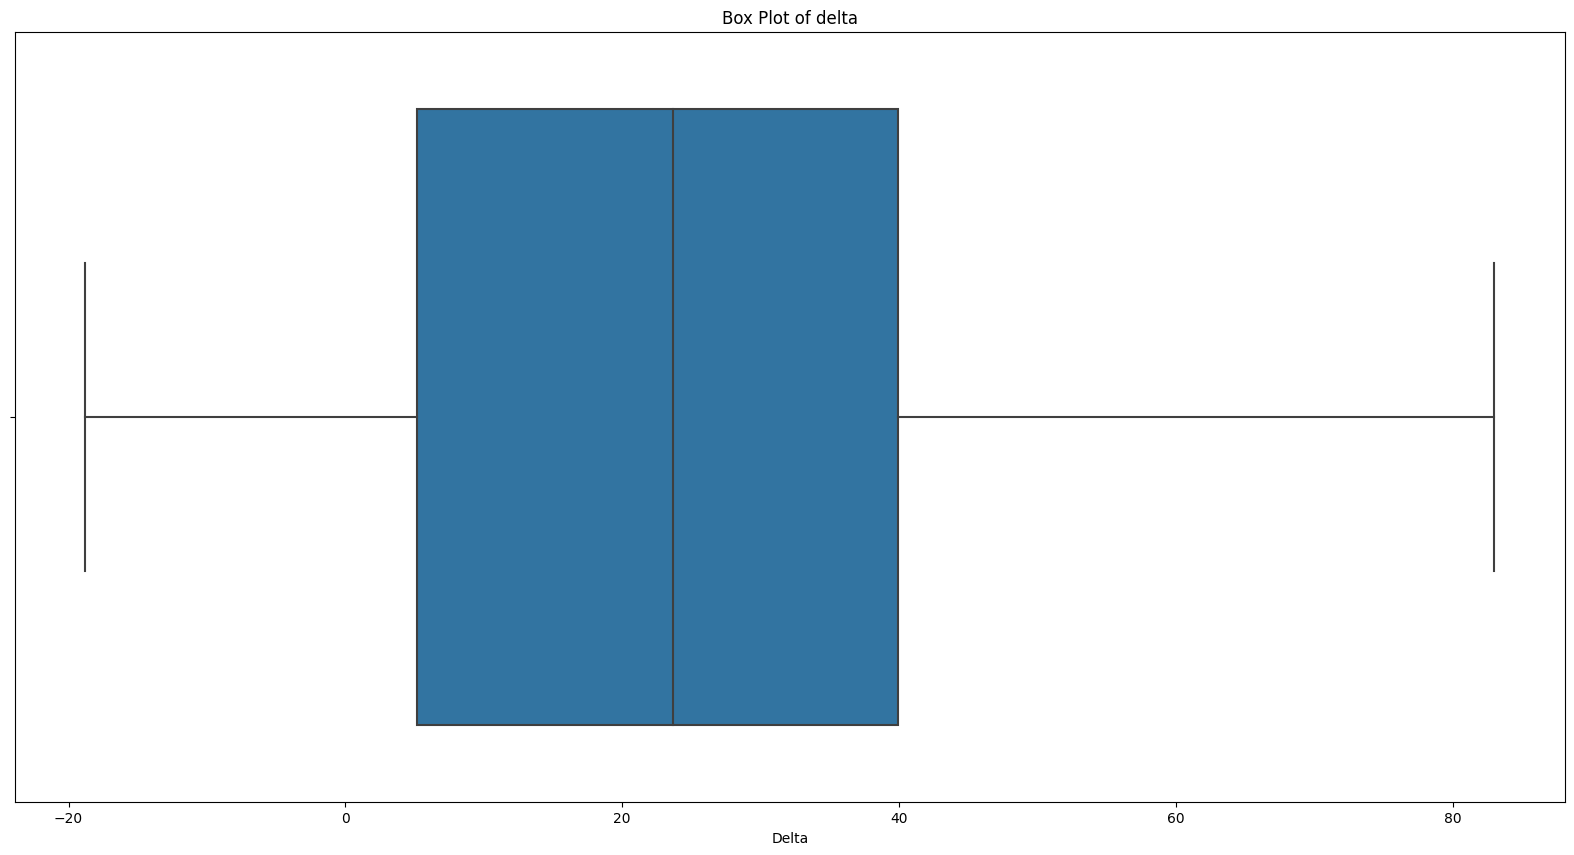

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['delta'])
plt.title('Box Plot of delta')
plt.xlabel('Delta')
plt.show()

The above box plot shows that the delta feature is slightly right skewed indicating that mean is slighty greater than the median. The two whiskers at the end indicates the lower and upper bound for this feature. Since there are no points outside the whiskers, we can conclude it has no outliers.

### Bi-Variate Analysis

It helps to understand and visualize the relation between two vairables. It can be useful to understand how one variable affects the other.

**Histplot between alpha(feature) and target  as well as plate(feature) and target**

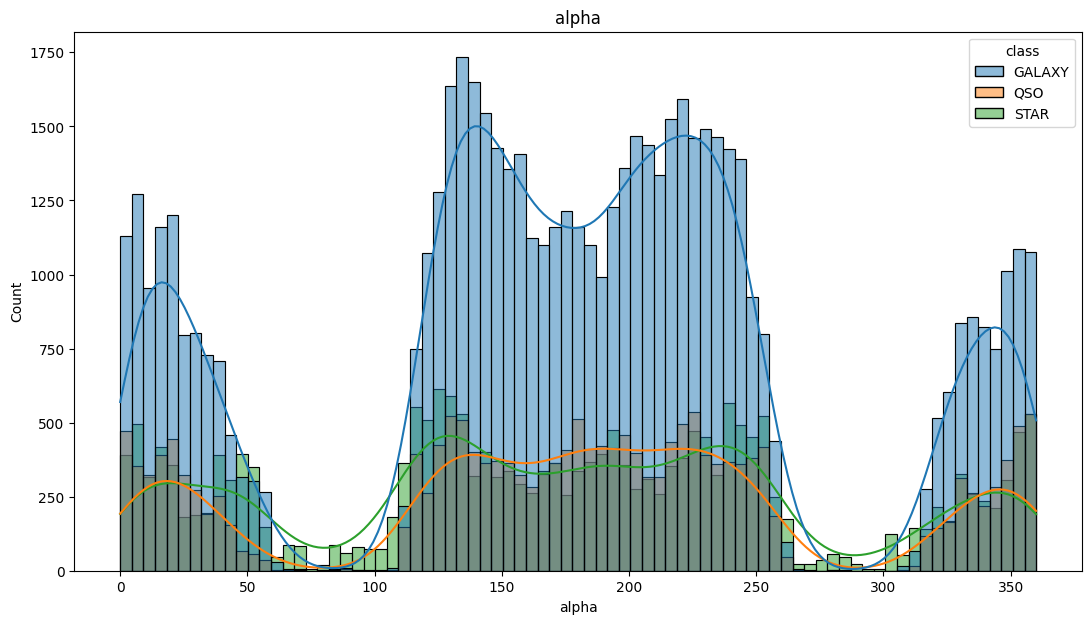

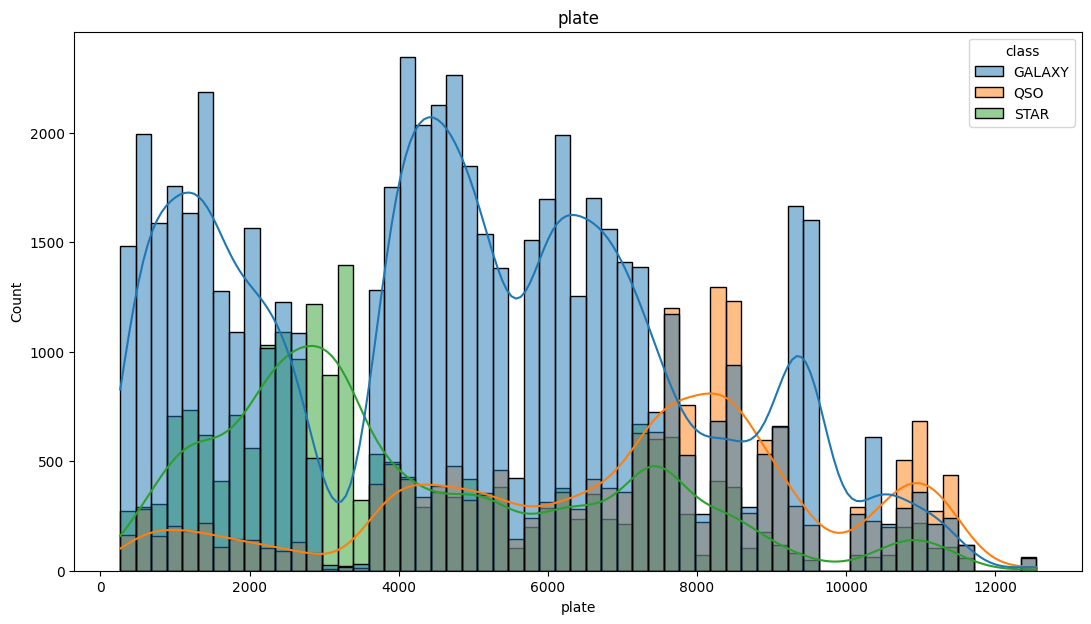

In [16]:
for i in ['alpha','plate']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=df, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()    

The above visualization shows us that alpha and plates can be used to distinguish between the classes.The plot shows the distribution of alpha and plates within each class and how they contribute to class separation.

**Encoding the target to numerical values**

In [17]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

**Removing any potential outliers based on interquartile range**

In [18]:
def outlierRemoval():
    initial = df.shape

    for i in df.select_dtypes(include = 'number').columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR =  Q3 - Q1
        lowerBound = Q1-(1.5*IQR)
        upperBound = Q3+(1.5*IQR)
        min_in = df[df[i]<lowerBound].index
        max_in = df[df[i]>upperBound].index
        df.drop(min_in, inplace = True)
        df.drop(max_in, inplace = True)

    final = df.shape
    outliers = initial[0] - final[0]
    return outliers
print("Number of outliers deleted are : ",outlierRemoval())

Number of outliers deleted are :  14266


**HeatMap**

HeatMap allows us to visualize the correlation and linear relationship among the variables. It can be useful for feature selection as it highlights the correlation between the features. The values closer to 1 indicates strong positive correlation whereas values closer to -1 indicates strong negative correlation.

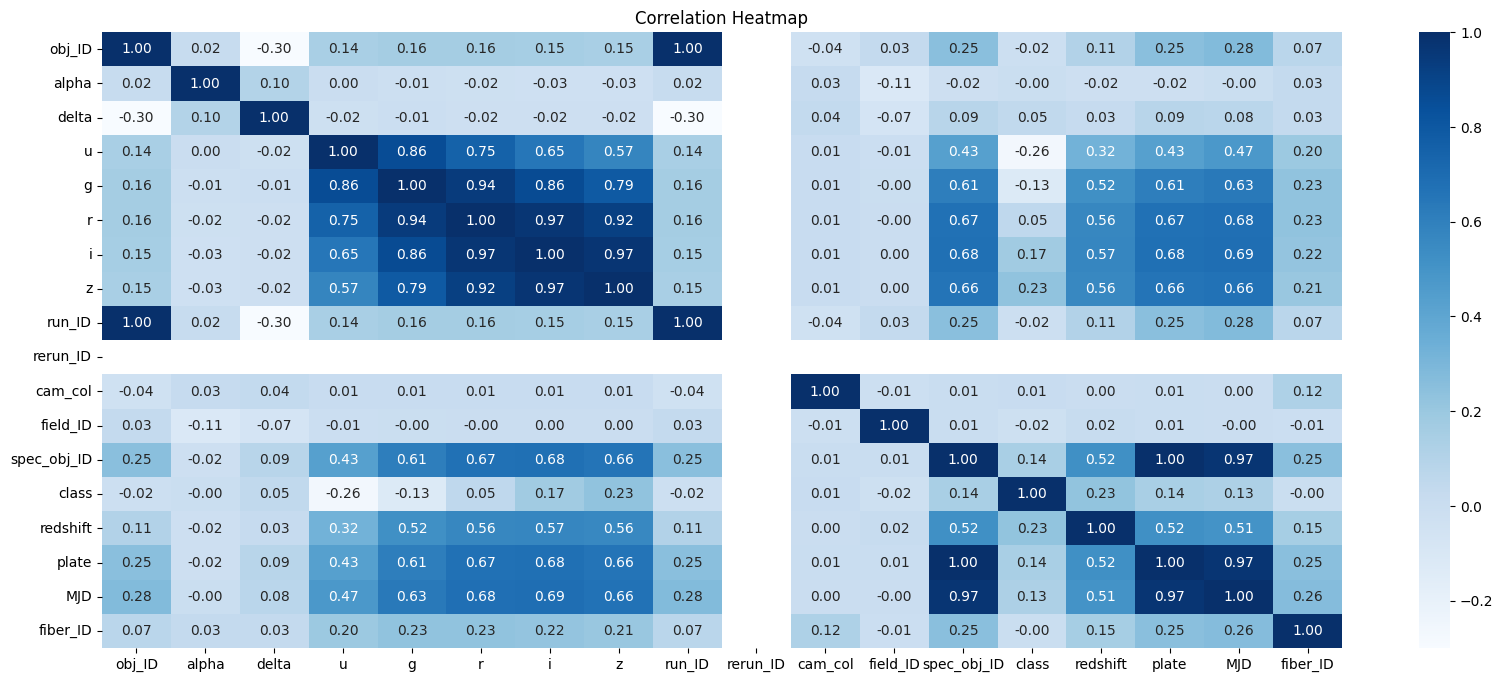

In [19]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True,cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Data Preparation and Model Selection**

### Dataset splitting 

**Spliting the Dataset into feature and target**

In [20]:
X=df.drop(columns="class")
Y=df["class"]

### Creating Training and Testing set 

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Splitting the dataset into train and test is necessary to see how well the model will perform with unseen data. The sklearn's train_test_split uses holdout method to randomly split the dataset into  train and test set. In this case the train set is made up of 80% of dataset and remaining 20% is converted into test set.

### Choosing the right models
 Since the heatmap during EDA showed little to no linear relationship among the feature and variable, for this task we will be choosing Support Vector Classifier due to it being a good fit for non linear relation ship and RandomForest Classifier due to it being an ensemble method.

##  **Initial Models**

### Support Vector Classifier 

SVC works by finding a optimal hyperplane that maximixes the margin to separates the classes. It makes use of support vector to find the optimal hyperplane.It predicts the class by determining on which side of the hyperplane the new data point falls on.

In [22]:
from sklearn.svm import SVC
initial_svc=SVC(random_state=42)

initial_svc.fit(x_train,y_train)

SVC(random_state=42)

In [23]:
yTrain_pred=initial_svc.predict(x_train)
yTest_pred=initial_svc.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accTrain_svc=accuracy_score(y_train,yTrain_pred)
print(f"Accuracy on training set : {accTrain_svc*100:.3f} %")

accTest_svc=accuracy_score(y_test,yTest_pred)
print(f"Accuracy on test set : {accTest_svc*100:.3f} %")

Accuracy on training set : 64.849 %
Accuracy on test set : 64.775 %


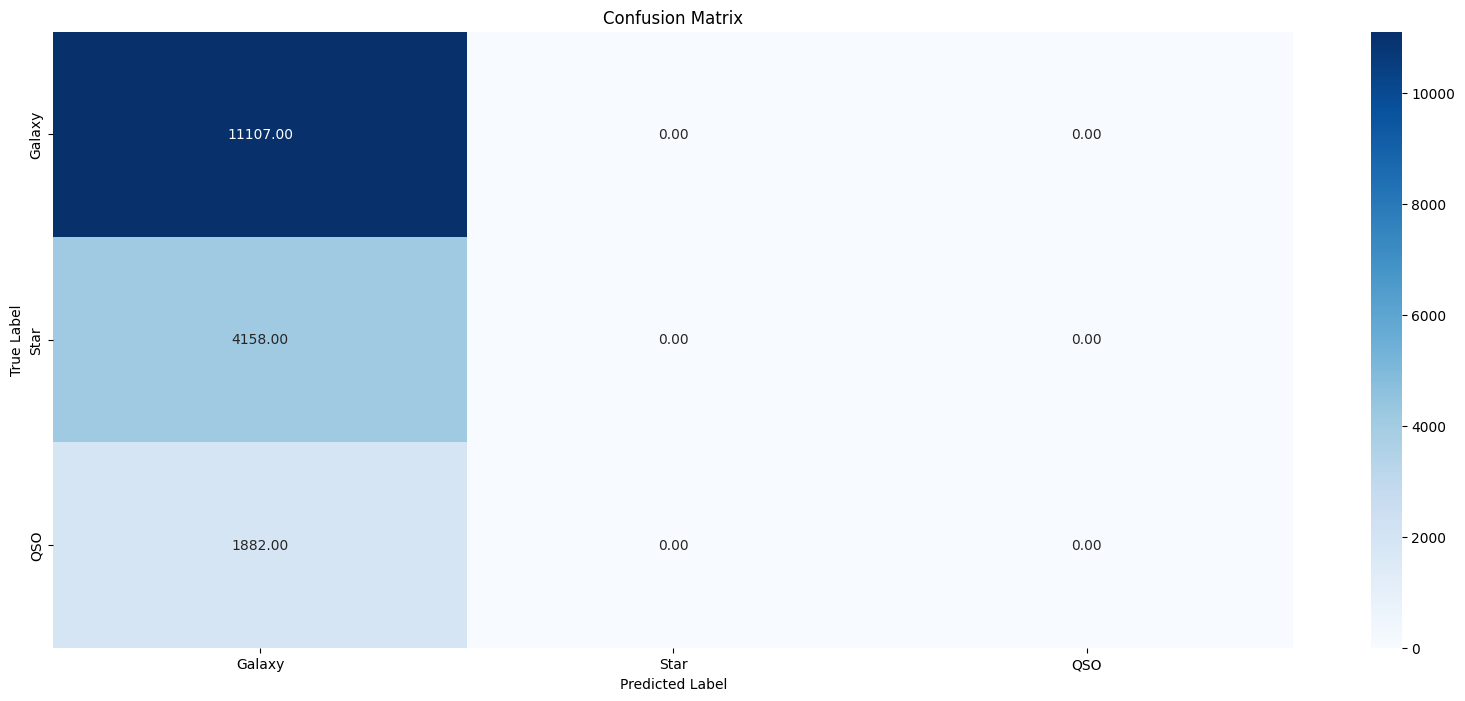

In [25]:
confusion_matrix_svc=confusion_matrix(y_test,yTest_pred)
labels = ["Galaxy", "Star", "QSO"]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_svc, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
class_report_svc=classification_report(y_test,yTest_pred)

print("The initial classification report using SVC:\n")
print(class_report_svc)

The initial classification report using SVC:

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     11107
           1       0.00      0.00      0.00      4158
           2       0.00      0.00      0.00      1882

    accuracy                           0.65     17147
   macro avg       0.22      0.33      0.26     17147
weighted avg       0.42      0.65      0.51     17147



**observations**

The Support Vector Classifier performed poorly on the dataset, achieving 64.849 % on training set and 64.775 % on test set.This could be the result of imbalances in the class. Also, SVC only successfully predicted GALAXY class failed to predict the other classes resulting in 0 precision,recall and f1-score for these classes.

Here, 
* **precision**:ratio of true positive prediction to all positive prediction 
* **recall**:ratio of correct prediction (true positives)to all prediction of the actual positive class
* **f1-score**:the weighted average of Precision and Recall.
       

### Random Forest Classifier 

RFC works by training multiple decision trees using random subsets of the training data and features. It combines the prediction of these decision trees to make the final classification detection. RFC is robust to outliers and class imbalances.

In [27]:
from sklearn.ensemble import RandomForestClassifier
initial_rfc=RandomForestClassifier(random_state=42)
initial_rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
yTrain_pred=initial_rfc.predict(x_train)
yTest_pred=initial_rfc.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accTrain_rfc=accuracy_score(y_train,yTrain_pred)
print(f"Accuracy on training set : {accTrain_rfc*100:.3f} %")

accTest_rfc=accuracy_score(y_test,yTest_pred)
print(f"Accuracy on test set : {accTest_rfc*100:.3f} %")

Accuracy on training set : 99.996 %
Accuracy on test set : 97.755 %


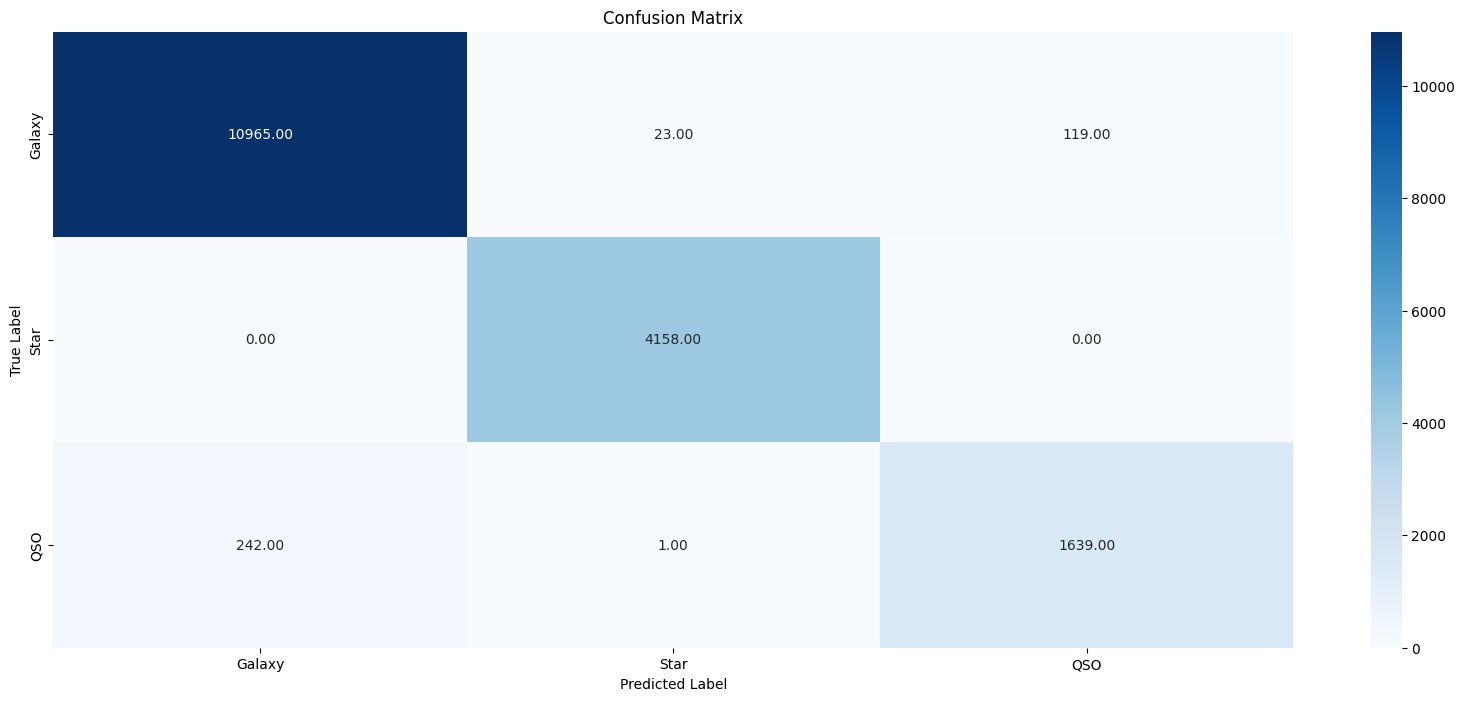

In [30]:
confusion_matrix_rfc=confusion_matrix(y_test,yTest_pred)
labels = ["Galaxy", "Star", "QSO"]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_rfc, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
class_report_rfc=classification_report(y_test,yTest_pred)

print("The initial classification report using RFC:\n")
print(class_report_rfc)

The initial classification report using RFC:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11107
           1       0.99      1.00      1.00      4158
           2       0.93      0.87      0.90      1882

    accuracy                           0.98     17147
   macro avg       0.97      0.95      0.96     17147
weighted avg       0.98      0.98      0.98     17147



**Observations**

RandomForestClassifier perfomed exceptionally well on the dataset achieving 99.996 % on training set and 97.755 % on test set with high precision, recall, and F1-score values for each class indicating that the RFC model effectively distinguishes between different classes of objects (Galaxy, Star, and QSO) in the dataset.

Here, 
* **precision**:ratio of true positive prediction to all positive prediction 
* **recall**:ratio of correct prediction (true positives)to all prediction of the actual positive class
* **f1-score**:the weighted average of Precision and Recall.
       

## **Feature Selection and HyperParameter Tuning**

Feature selection helps the model focus on the most important features, improving efficiency and accuracy while Hyperparameter tuning is essential to optimize the model's performance by finding the most suitable settings for parametersHyperparameter tuning is essential to optimize the model's performance by finding the most suitable settings for parameters

### Feature Selection for RandomForest Classifier  

In [32]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(initial_rfc, prefit=True)
X_new = model.transform(X)
print(X.shape)


(85734, 17)


In [33]:
X_new.shape

(85734, 3)

By using the  embedded method to select optimal features for the Random Forest Classifier (RFC), the algorithm identified the most informative features and chose 3 out of the 17 available features.

### New training and testing sets after feature selection (RFC) 

In [34]:
x_train_v1,x_test_v1,y_train_v1,y_test_v1=train_test_split(X_new,Y,test_size=0.2,random_state=42)

### HyperParameter Tuning for RandomForestClassifier

### Using RandomizeSearchCV
 
RandomizedSearchCV randomly samples hyperparameters from predefined distributions and performs cross-validation to find the best combination. It is suitable for finding optimal hyperparameters,especially those with large hyperparameter space.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],"min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4],
      "criterion": ["gini", "entropy"]
      }
clf=RandomForestClassifier(random_state=42)
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=5,cv=2,verbose=2)
rs_clf.fit(x_train_v1,y_train_v1)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.6s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.7s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  13.3s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  13.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.6s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.6s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [36]:
best_param=rs_clf.best_params_
print(best_param)

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}


**Training the model after feature selection and hyperparamter tuning**

In [37]:
final_rfc=RandomForestClassifier(**best_param,random_state=42)
final_rfc.fit(x_train_v1,y_train_v1)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='auto',
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=200, random_state=42)

In [38]:
yTrain_predF=final_rfc.predict(x_train_v1)
yTest_predF=final_rfc.predict(x_test_v1)

In [39]:
accTrain_rfc_final=accuracy_score(y_train_v1,yTrain_predF)
print(f"Accuracy on training set : {accTrain_rfc_final*100:.3f} %")

accTest_rfc_final=accuracy_score(y_test_v1,yTest_predF)
print(f"Accuracy on test set : {accTest_rfc_final*100:.3f} %")

Accuracy on training set : 98.745 %
Accuracy on test set : 96.967 %


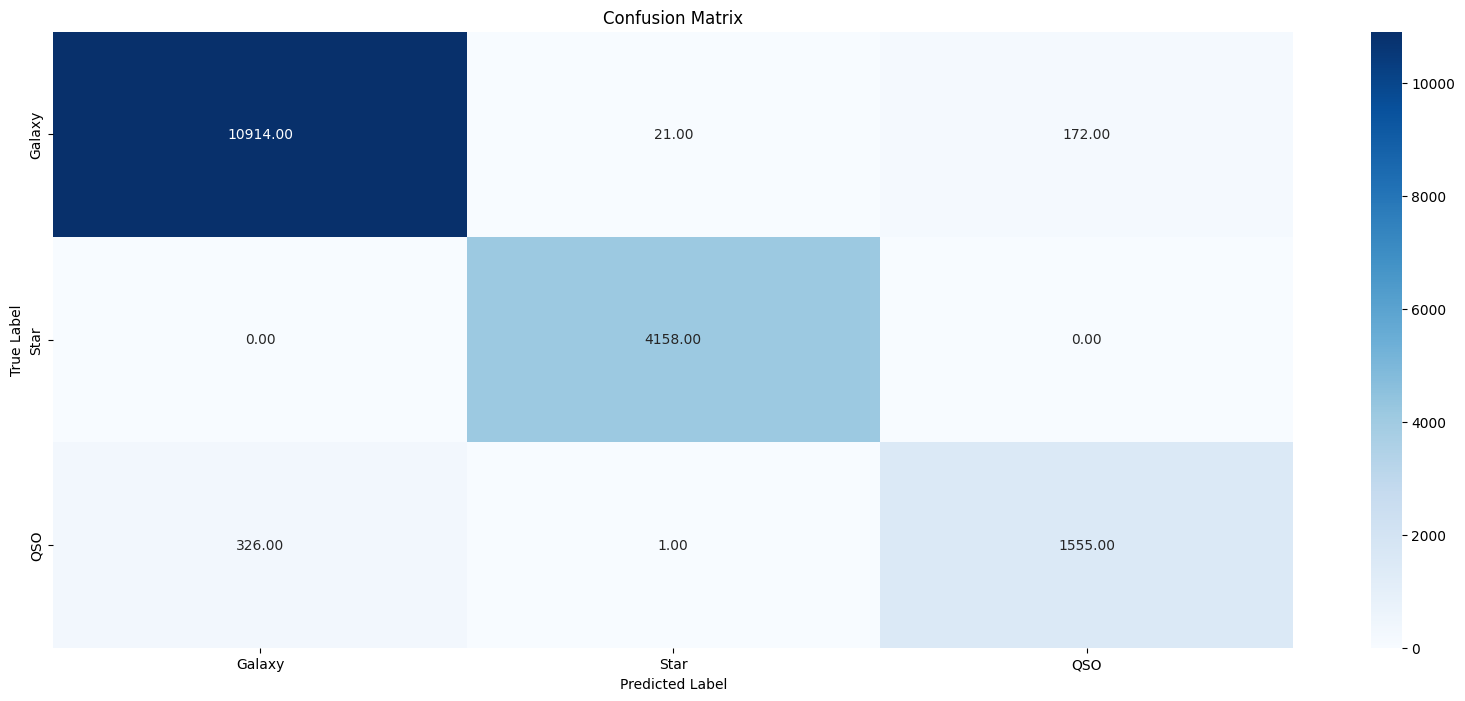

In [41]:
confusion_matrix_rfc_final=confusion_matrix(y_test_v1,yTest_predF)
labels = ["Galaxy", "Star", "QSO"]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_rfc_final, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
class_report_rfc_final=classification_report(y_test_v1,yTest_predF)

print("The final classification report using RFC:\n")
print(class_report_rfc_final)

The final classification report using RFC:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11107
           1       0.99      1.00      1.00      4158
           2       0.90      0.83      0.86      1882

    accuracy                           0.97     17147
   macro avg       0.96      0.94      0.95     17147
weighted avg       0.97      0.97      0.97     17147



**Observations**

RandomForestClassifier perfomed  well on the dataset after hyperparameter tuning and feature selectioon, achieving 98.745 % on training set and 96.967 % on test set with high precision, recall, and F1-score values for each class indicating that the RFC model effectively distinguishes between different classes of objects (Galaxy, Star, and QSO) in the dataset.

Although, there is very slight drop compared to initial model, it can still be considered an optimal model as it uses less features (3) compared to initial(17) effectively reducing the dimension and computational costs without any significant difference.

Here, 
* **precision**:ratio of true positive prediction to all positive prediction 
* **recall**:ratio of correct prediction (true positives)to all prediction of the actual positive class
* **f1-score**:the weighted average of Precision and Recall.
       

### Feature Selection for Support Vector Classifier

In [43]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

### Using SelectKBest with mutual_info_classif 

SelectKBest selects the top k features based on statistical tests while mutual_info_classif calculates the mutual information between features and the target variable, selecting features with high information gain.

In [44]:
selector=SelectKBest(mutual_info_classif,k=5)
selector.fit(X,Y)

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x78d9cc028820>)

In [45]:
x_new=selector.transform(X)
x_new.shape

(85734, 5)

### New training set after feature selection (SVC) 

In [46]:
x_train_v2,x_test_v2,y_train_v2,y_test_v2=train_test_split(x_new,Y,test_size=0.2,random_state=42)

### Hyperparameter tuning for SVC

In [47]:
grid={'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
      }
svc=SVC(random_state=42)
rs_svc=RandomizedSearchCV(estimator=svc,param_distributions=grid,n_iter=4,cv=2,verbose=2)
rs_svc.fit(x_train_v2,y_train_v2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.3min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  50.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  50.1s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 1.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 1.3min


RandomizedSearchCV(cv=2, estimator=SVC(random_state=42), n_iter=4,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [48]:
best_params = rs_svc.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


In [49]:
final_svc=SVC(**best_params,random_state=42)
final_svc.fit(x_train_v2,y_train_v2)

SVC(C=0.1, random_state=42)

In [50]:
yTrain_predF=final_svc.predict(x_train_v2)
yTest_predF=final_svc.predict(x_test_v2)

In [51]:
accTrain_svc_final=accuracy_score(y_train_v2,yTrain_predF)
print(f"Accuracy on training set : {accTrain_svc_final*100:.3f} %")

accTest_svc_final=accuracy_score(y_test_v2,yTest_predF)
print(f"Accuracy on test set : {accTest_svc_final*100:.3f} %")

Accuracy on training set : 64.849 %
Accuracy on test set : 64.775 %


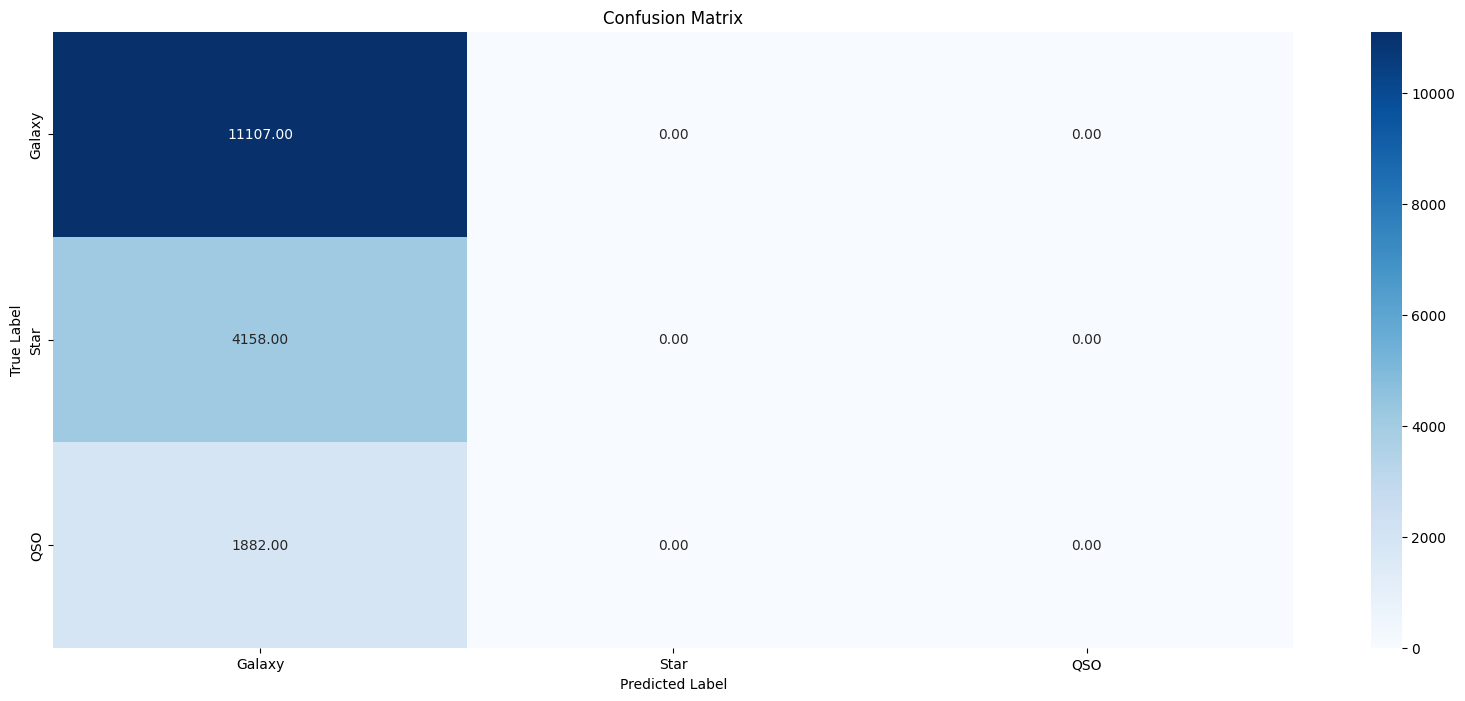

In [52]:
confusion_matrix_svc_final=confusion_matrix(y_test_v2,yTest_predF)
labels = ["Galaxy", "Star", "QSO"]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_svc_final, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
class_report_svc_final=classification_report(y_test_v2,yTest_predF)

print("The final classification report using SVC:\n")
print(class_report_svc_final)

The final classification report using SVC:

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     11107
           1       0.00      0.00      0.00      4158
           2       0.00      0.00      0.00      1882

    accuracy                           0.65     17147
   macro avg       0.22      0.33      0.26     17147
weighted avg       0.42      0.65      0.51     17147



Despite hyperparameter tuning and feature selection, the Support Vector Classifier performed poorly on the dataset, achieving 64.849 % on training set and 64.775 % on test set.This could be the result of imbalances in the class. Also, SVC only successfully predicted GALAXY class failed to predict the other classes resulting in 0 precision,recall and f1-score for these classes. Both the initial and final model for SVC failed to perfom as expected.

Here, 
* **precision**:ratio of true positive prediction to all positive prediction 
* **recall**:ratio of correct prediction (true positives)to all prediction of the actual positive class
* **f1-score**:the weighted average of Precision and Recall.
       

## **Conclusion**

Overall, the RandomForest Classifier outperfomed the Support Vector Classifier for both the initial and final model. For RFC, after the hyperparameter tuning and feature selection, there were slight drops in the accuracy however no significant drop was seen. For Support Vector Classifier, the hyperparameter tuning as well as feature selection did not help to improve the models performance.

The hyperparameter tuning and feature selection helped to reduce the dimensionality and reduce the complexity as well as the overall computational cost without compromising the performance of the RandomForest Classifier.
In conclusion, for this classification task RandomForest Classifier is the best model as it was able to get high accuracy with good recall,precision and f1-score with less features without compromising the initial accuracy of the model.

### **REGRESSION** 

### Importing necessary libraries required for data preprocessing and visualization

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')#to ignore any warnings generated

### Basic Overview of the Dataset

In [30]:
rdf=pd.read_csv("/kaggle/input/life-expectancy/Life Expectancy Data.csv")

In [31]:
rdf.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
rdf.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


The above output provides us a clear representation of the structure of our dataset. The dataset consists of 21 feature columns and 1 target column. This helps to be familiar with the dimension of our dataset.

In [9]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The provided output gives us general idea about the data types that our dataset comprises of. We can observe that the two columns are of object data type while the rest columns consists of both float and integer data type.

### Checking and Handling duplicate values


In [32]:
print(f"Total number of duplicated values in the dataset {rdf.duplicated().sum()}")

Total number of duplicated values in the dataset 0


There were no duplicate values present in the dataset.If present we would drop them using drop_duplicates().

### Checking and Handling missing values 

In [33]:
rdf.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

**using median to fill the missing values**

In [34]:
numberCol = rdf.select_dtypes(include='number').columns
rdf[numberCol] = rdf[numberCol].fillna(rdf[numberCol].median())

In [35]:
rdf.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

The missing values have been successfully handled.

### Summary Statistics 

**Separating categorical and numerical columns**

In [36]:
categoricalCol = rdf.select_dtypes(include='object')
numericCol = rdf.select_dtypes(include='number')

**Summary statistics for Numerical Columns**

In [37]:
numericCol.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


The provided output helps us in understanding the central tendency,dispersion and data distributions of the features in our dataset.

* **Count**: Represents the non-null values for each attributes
* **Mean** :Represents the average values for each attributes
* **std**:Represents the spread of data around the mean
* **min**: represents the minimum values for each attributes.
* **25%**: Represents Q1,that indicates 25% of datas fall under this value.
* **50%**: Represents median,that indicates 50% of datas fall under this value.
* **75%**: Represents Q3,that indicates 75% of datas fall under this value.
* **max**: Represents the maximum values for each attributes.

**Summary statistics for categorical Columns**

In [38]:
print(categoricalCol.describe())

            Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426


The summary statistics show that for Country column, Afghanistan is the most occuring country with frequency of 16 and for Status column, Developing is the most occuring status with the frequency of 2426.

### Univariate Analysis 

Univariate analysis is a crucial step as it helps us to analyse individual vairables which can help in understanding the columns of our dataset , including but not limited to outliers and data distribution.

**Some univariate analysis:**
* **Categorical**
    1. Count Plot
    2. Pie Chart
* **Numerical**
    1. Histogram
    2. Distplot
    3. Box plot 

**Histplot of our target column**

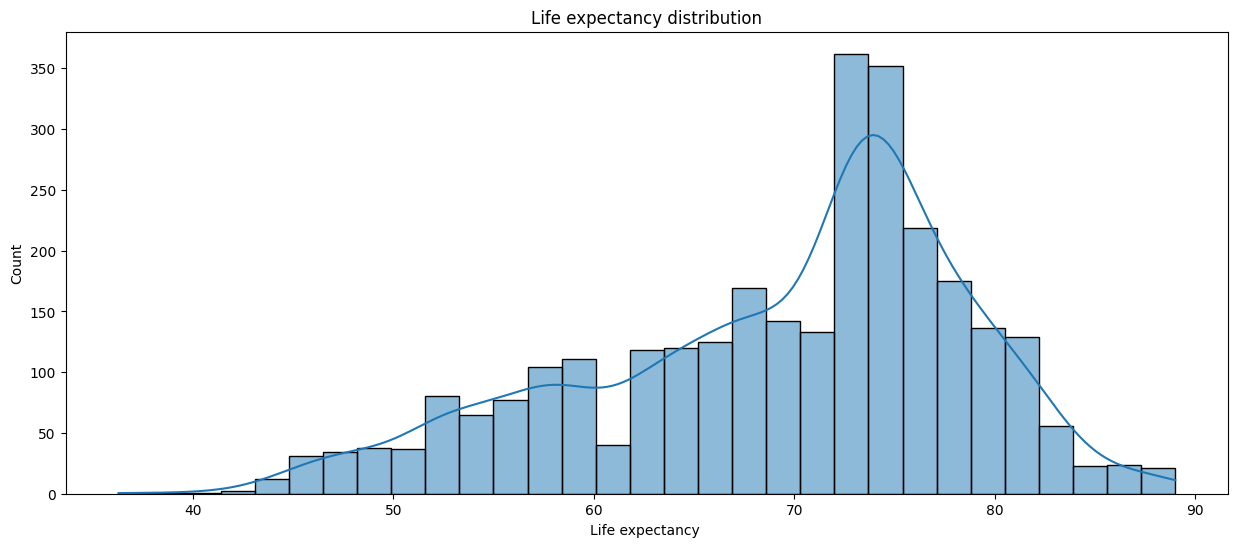

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(rdf['Life expectancy '],kde=True)
plt.title("Life expectancy distribution")
plt.show()

The above plot shows the distribution of our target column. We can observe that it is left skewed with its median being greater than mean.

**countplot of our status column**

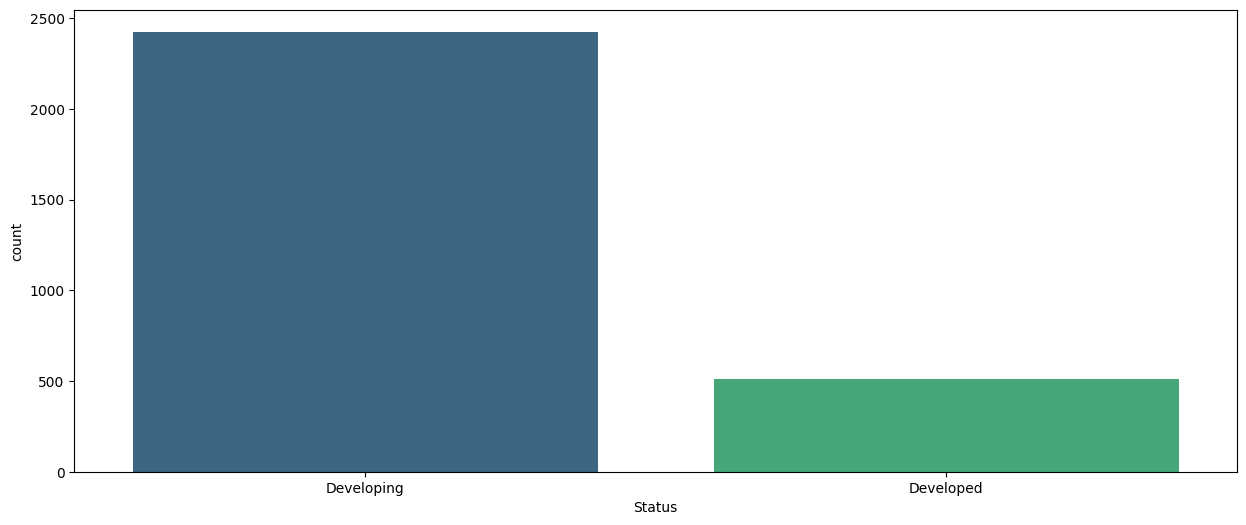

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x=rdf['Status'],palette='viridis')
plt.show()
rdf["Status"].value_counts()

The above plot shows that the Developing clearly outnumbers other two classes. This shows that there is high frequency of countries with the status Developing compared to Developed.

### Bi-Variate Analysis

It helps to understand and visualize the relation between two vairables. It can be useful to understand how one variable affects the other.

**Scatter plot between Adult Mortality(Feature) and Life Expectancy(target)**

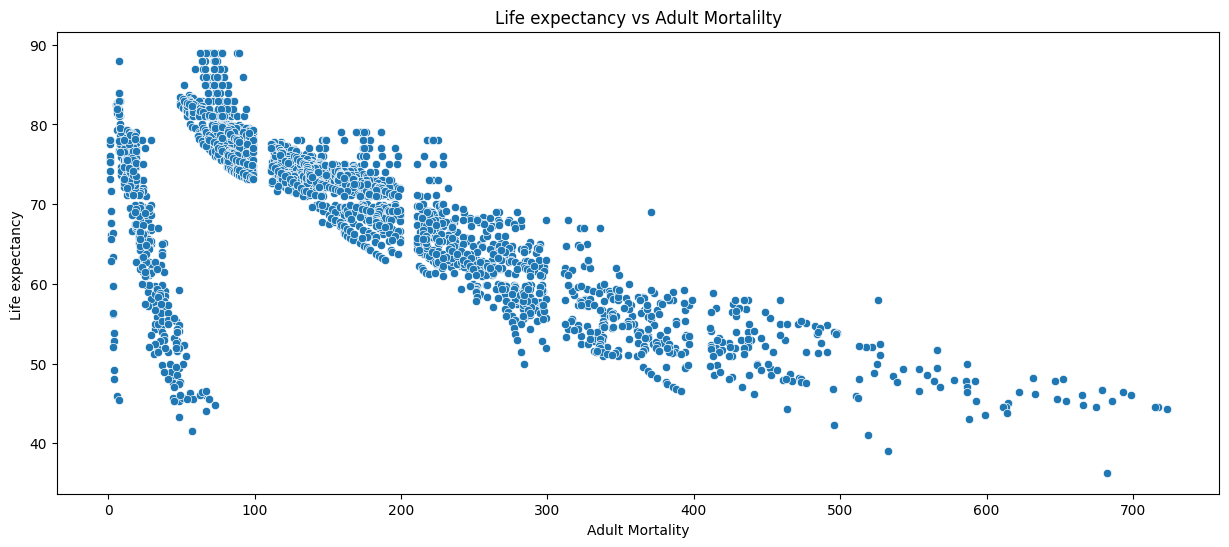

In [20]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=rdf,x="Adult Mortality",y="Life expectancy ")
plt.title("Life expectancy vs Adult Mortalilty")
plt.show()

The above scatterplot shows the relationship between Adult Mortality and Life expectancy. We can observe a strong negative correlation between the two variables. As the Adult Mortality rate increases, the life expectancy can be observed significantly decreasing . This shows us that life expectancy is affected byu Adult Mortality rate.

**Scatter plot between Schooling(Feature) and Life Expectancy(target)**

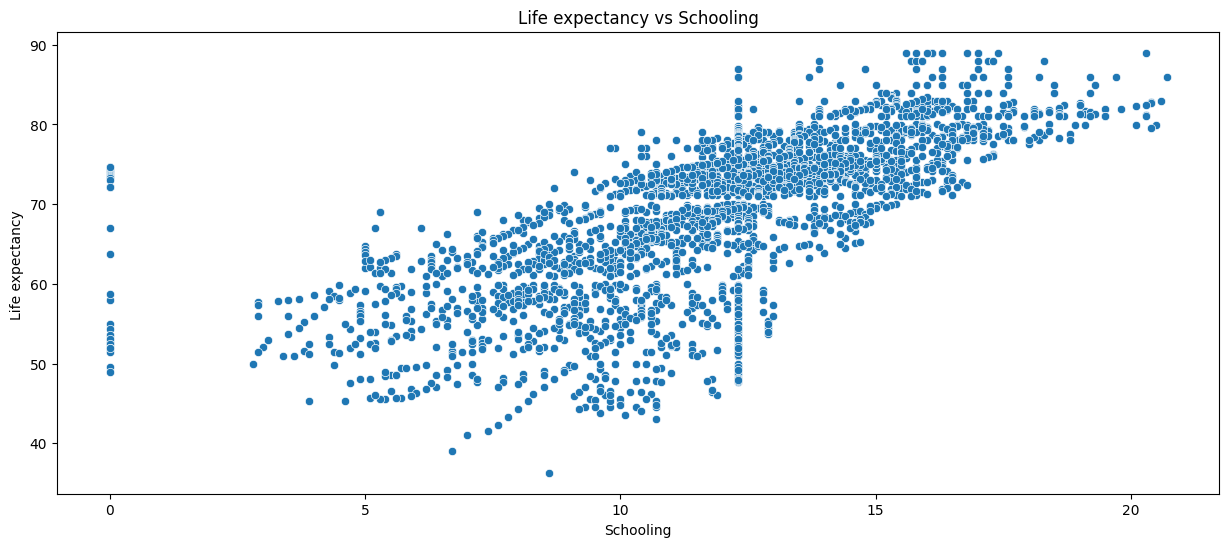

In [28]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=rdf,x="Schooling",y="Life expectancy ")
plt.title("Life expectancy vs Schooling")
plt.show()

The above scatterplot shows the relationship between Schooling and Life expectancy. We can observe a strong positive correlation between the two variables. As the Schooling rate increases, the life expectancy can be observed significantly increasing . This shows us that life expectancy is affected by Schooling.

**Dropping the country column as it is not useful for prediciting life expectancy**

In [39]:
rdf.drop(columns="Country", inplace=True)

**Encoding the Status column to numeric value**

In [40]:
rdf["Status"]=[0 if i == "Developing" else 1  for i in rdf["Status"]]

**HeatMap**

HeatMap allows us to visualize the correlation and linear relationship among the variables. It can be useful for feature selection as it highlights the correlation between the features. The values closer to 1 indicates strong positive correlation whereas values closer to -1 indicates strong negative correlation.

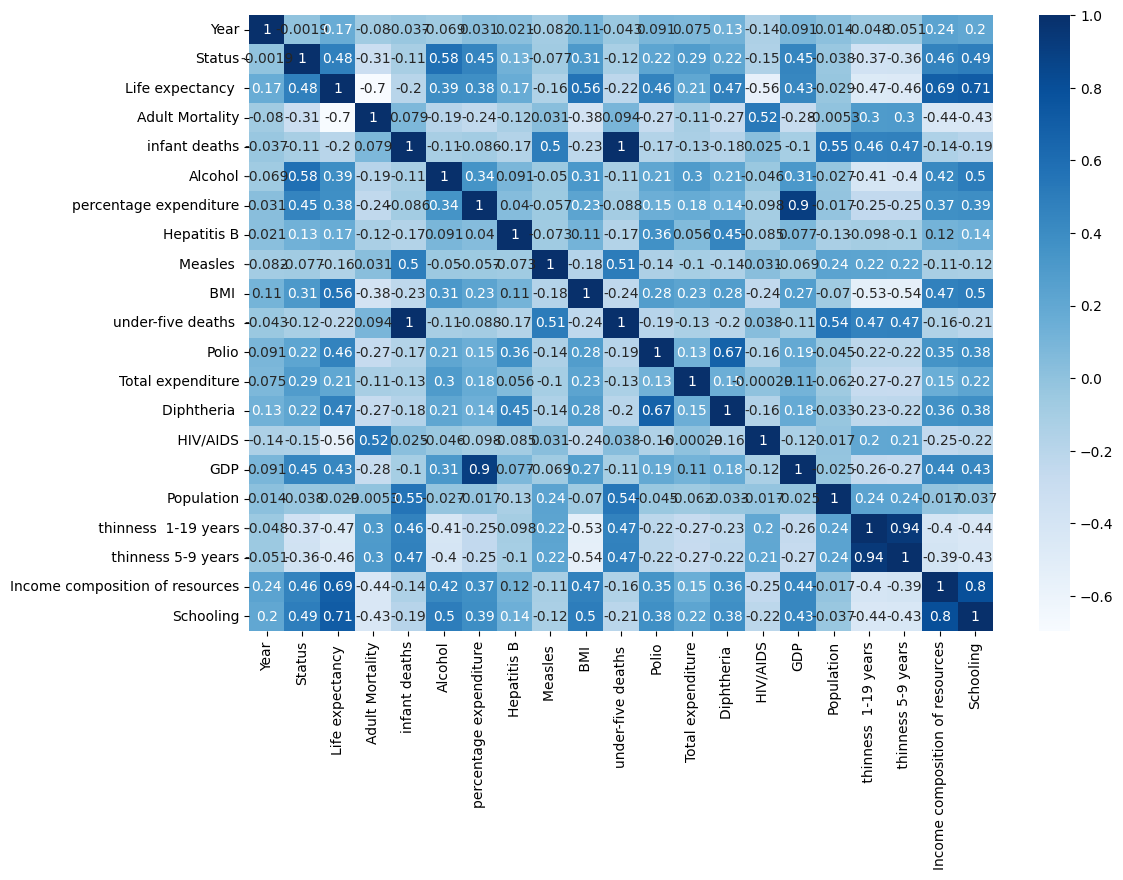

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(rdf.corr(),annot=True,cmap="Blues")
plt.show()

# **Data Preparation and Model Selection** 

### Dataset splitting 

**Spliting the Dataset into feature and target**

In [43]:
X=rdf.drop(columns="Life expectancy ")
Y=rdf["Life expectancy "]


In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

Splitting the dataset into train and test is necessary to see how well the model will perform with unseen data. The sklearn's train_test_split uses holdout method to randomly split the dataset into  train and test set. In this case the train set is made up of 80% of dataset and remaining 20% is converted into test set.

### Choosing the right models
 Since the heatmap during EDA showed  linear relationship among the features and variable, for this task we will be choosing Linear Regression due to it being a good fit for  linear relation ship and RandomForest Regressor due to it being an ensemble method.

## **Initial Models** 

### Linear Regression

Linear Regression works by fitting a straight line to the data points minimizing the difference between observer and predicted values. It uses equation of a straight line to model a relationship between features and target.

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_trainP=lr.predict(x_train)
y_testP=lr.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error,r2_score
print("For training set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_train,y_trainP))}")
print(f"MAE:{mean_absolute_error(y_train,y_trainP)}")
print(f"R2 Score: {r2_score(y_train,y_trainP)}")

For training set:

RMSE:3.9925932353551654
MAE:2.9662832832896457
R2 Score: 0.8223893163776909


In [50]:
print("For test set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_testP))}")
print(f"MAE:{mean_absolute_error(y_test,y_testP)}")
print(f"R2 Score:{r2_score(y_test,y_testP)}")

For test set:

RMSE:4.226972484845341
MAE:3.1712162105347774
R2 Score:0.8077570548139164


**Observations**

The linear model performs good on both training and test set.The performance is slightly compromised when introduced to unseen data(test set). Overall, the RMSE score and MAE are not so high and r2 score is also 0.80 for test set,indicating model performs good with room for imporvements.

### RandomForestRegressor

RFR works by training multiple decision trees using random subsets of the training data and features. It combines the prediction of these decision trees to make the final prediction for the target. RFR is robust to outliers.

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=7)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=7)

In [52]:
y_TrainP=rfr.predict(x_train)
y_TestP=rfr.predict(x_test)

In [53]:
print("For training set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_train,y_TrainP))}")
print(f"MAE:{mean_absolute_error(y_train,y_TrainP)}")
print(f"R2 Score:{r2_score(y_train,y_TrainP)}")

For training set:

RMSE:0.6705620180117567
MAE:0.42112212765957624
R2 Score:0.9949900100624267


In [54]:
print("For test set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_TestP))}")
print(f"MAE:{mean_absolute_error(y_test,y_TestP)}")
print(f"R2 Score:{r2_score(y_test,y_TestP)}")

For test set:

RMSE:2.1010289340303374
MAE:1.2622312925170092
R2 Score:0.9525041530803975


The RFR model performed expetionally well with Low RMSE and MAE with R2 score being 0.95 indicating a good model perfomance.It indicates that even for test data, the predicted values are close to the actual values. Overall this model performs better compared to Linear Regression.

## **Feature Selection and HyperParameter Tuning**

Feature selection helps the model focus on the most important features, improving efficiency and accuracy while Hyperparameter tuning is essential to optimize the model's performance by finding the most suitable settings for parameters.Hyperparameter tuning is essential to optimize the model's performance by finding the most suitable settings for parameters

### Feature Selection for RandomForest Regressor

In [55]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rfr, prefit=True)
X_new = model.transform(X)
print(X.shape)
print(X_new.shape)

(2938, 20)
(2938, 3)


By using the  embedded method to select optimal features for the Random Forest Regressor (RFR), the algorithm identified the most informative features and chose 3 out of the 20 available features.

### New training and testing sets after feature selection (RFR) 

In [56]:
x_train_v1,x_test_v1,y_train_v1,y_test_v1=train_test_split(X_new,Y,test_size=0.2,random_state=7)

### HyperParameter Tuning for RandomForestRegressor

### Using RandomizeSearchCV
 
RandomizedSearchCV randomly samples hyperparameters from predefined distributions and performs cross-validation to find the best combination. It is suitable for finding optimal hyperparameters,especially those with large hyperparameter space.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],"min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4],
      "criterion": ['squared_error', 'absolute_error']
      }
regr=RandomForestRegressor(random_state=7)
rs_reg=RandomizedSearchCV(estimator=regr,param_distributions=grid,n_iter=5,cv=2,verbose=2)
rs_reg.fit(x_train_v1,y_train_v1)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   3.7s
[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   3.7s
[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   1.3s
[CV] END criterion=absolute_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, m

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=7),
                   n_iter=5,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [58]:
best_param=rs_reg.best_params_
print(best_param)

{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'squared_error'}


**Training the model after feature selection and hyperparamter tuning**


In [59]:
final_rfr=RandomForestRegressor(**best_param,random_state=7)
final_rfr.fit(x_train_v1,y_train_v1)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=4,
                      n_estimators=1000, random_state=7)

In [60]:
y_TrainP=final_rfr.predict(x_train_v1)
y_TestP=final_rfr.predict(x_test_v1)

In [61]:
print("For training set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_train_v1,y_TrainP))}")
print(f"MAE:{mean_absolute_error(y_train_v1,y_TrainP)}")
print(f"R2 Score:{r2_score(y_train_v1,y_TrainP)}")

For training set:

RMSE:1.1303107337787328
MAE:0.7738140355617165
R2 Score:0.9857650922742989


In [64]:
print("For test set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test_v1,y_TestP))}")
print(f"MAE:{mean_absolute_error(y_test_v1,y_TestP)}")
print(f"R2 Score:{r2_score(y_test_v1,y_TestP)}")

For test set:

RMSE:2.3390479754662734
MAE:1.6016399774498027
R2 Score:0.9411332812485899


**Observations**

The RFR model performed expetionally well with Low RMSE and MAE with R2 score being 0.94 indicating a good model perfomance.It indicates that even for test data, the predicted values are close to the actual values. Although there is a very slight drop in the metric score, it still be considered an optimal model as it uses less features (3) compared to initial(20) effectively reducing the dimension and computational costs without any significant difference.


### Feature Selection for Linear Regression

### Using SelectKBest,f_regressor

SelectKBest selects the top k features based on statistical tests while f_regressor helps to identify features that are most relevant for predicting the target variable in a regression context.

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression
selector=SelectKBest(f_regression,k=5)
selector.fit(X,Y)
x_new=selector.transform(X)
x_new.shape

(2938, 5)

### New training and testing sets after feature selection (Linear Reg) 

In [66]:
x_train_v2,x_test_v2,y_train_v2,y_test_v2=train_test_split(x_new,Y,test_size=0.2,random_state=7)

### Hyperparameter tuning for Linear Regression

In [67]:
from sklearn.model_selection import RandomizedSearchCV
grid={'fit_intercept': [True, False]}
reg1=LinearRegression()
rs_reg=RandomizedSearchCV(estimator=reg1,param_distributions=grid,n_iter=10,cv=5,verbose=2)
rs_reg.fit(x_train_v2,y_train_v2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   verbose=2)

In [68]:
best_params=rs_reg.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'fit_intercept': True}


**Training the model after feature selection and hyperparamter tuning**

In [69]:
final_linear=LinearRegression(**best_params)
final_linear.fit(x_train_v2,y_train_v2)


LinearRegression()

In [70]:
y_trainP=final_linear.predict(x_train_v2)
y_testP=final_linear.predict(x_test_v2)

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("For training set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_train_v2,y_trainP))}")
print(f"MAE:{mean_absolute_error(y_train_v2,y_trainP)}")
print(f"R2 Score:{r2_score(y_train_v2,y_trainP)}")

For training set:

RMSE:4.4980643682941075
MAE:3.2127221415141722
R2 Score:0.7745707403975413


In [72]:
print("For test set:\n")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test_v2,y_testP))}")
print(f"MAE:{mean_absolute_error(y_test_v2,y_testP)}")
print(f"R2 Score:{r2_score(y_test_v2,y_testP)}")

For test set:

RMSE:4.606786079886527
MAE:3.3515949829706058
R2 Score:0.7716570216540203


**Observations**

It can be seen that after hyperparameter tuning and feature selection, the model's performance has degraded compared to the initial model. This could be due to various factors like not all relevant features being selected or the model being overfitted in the inital phase. Likewise the presence of outliers in the selected features could also be a contributing factor for the performance degradation.

## **Conclusion**
Overall, the RandomForest Regressor outperfomed the Linear Regression for both the initial and final model. For RFR, after the hyperparameter tuning and feature selection, there were slight drops in the accuracy however no significant drop was seen. For Linear Regression, the hyperparameter tuning as well as feature selection caused degradation in the model's performance.

The hyperparameter tuning and feature selection helped to reduce the dimensionality and reduce the complexity as well as the overall computational cost without compromising the performance of the RandomForest Regressor.
In conclusion, for this regression  task RandomForest Regressor is the best model as it was able to get high accuracy with low RMSE and MAE and good r2 score with less features without compromising the initial accuracy of the model.
